In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
df=pd.read_csv(r'C:\Users\santh\Downloads\archive (2)\heart.csv')

In [54]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [55]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [56]:
df['age']=df['age'].astype(int)

### Exploratory Analysis

In [57]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int32(1), int64(10)
memory usage: 29.3 KB


### Data Visualization

<AxesSubplot:>

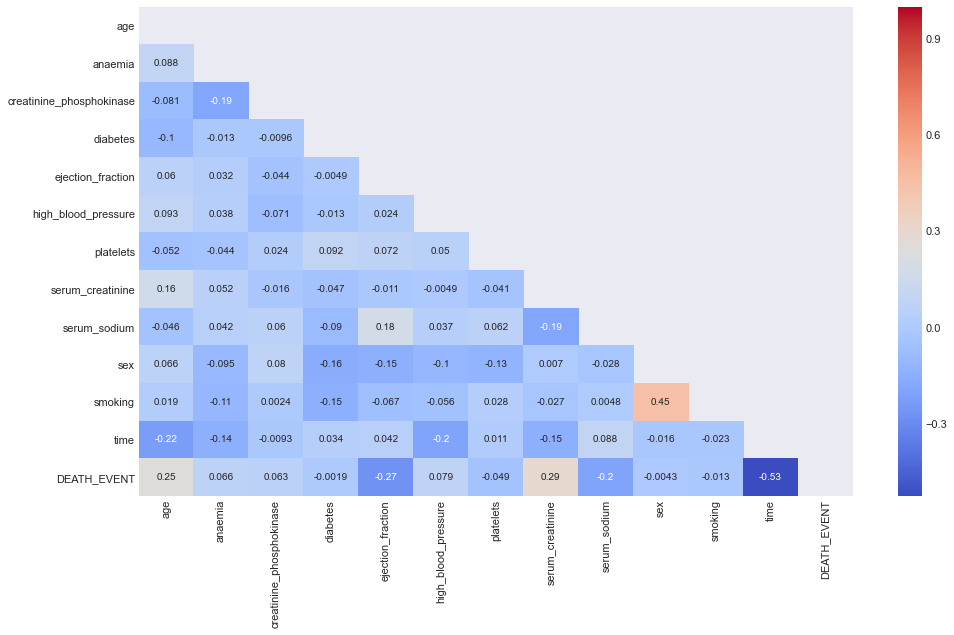

In [59]:
fig = plt.figure(figsize=[16, 9])
plt.style.use('seaborn-darkgrid')
sns.heatmap(df.corr(), annot=True, mask=np.triu(df.corr()), cmap='coolwarm')


In [60]:
df.drop('time', axis=1, inplace=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,1


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

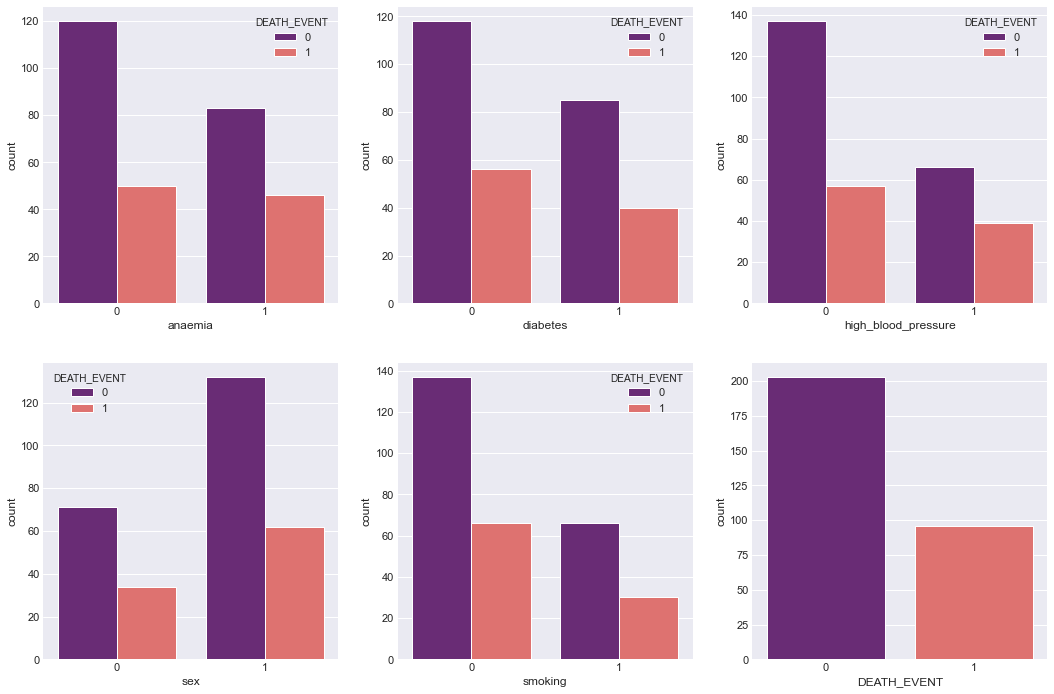

In [61]:
%matplotlib inline

_ = [1, 3, 5, 9, 10]
_ = list(enumerate([list(df.columns)[i] for i in _], start=1))

fig = plt.figure(figsize=[18,12])
for index, col_name in _:
    ax = fig.add_subplot(2, 3, index)
    sns.countplot(x=col_name, data=df, hue="DEATH_EVENT", palette='magma')

ax = fig.add_subplot(2, 3, 6)
sns.countplot(x='DEATH_EVENT', data=df, palette='magma')

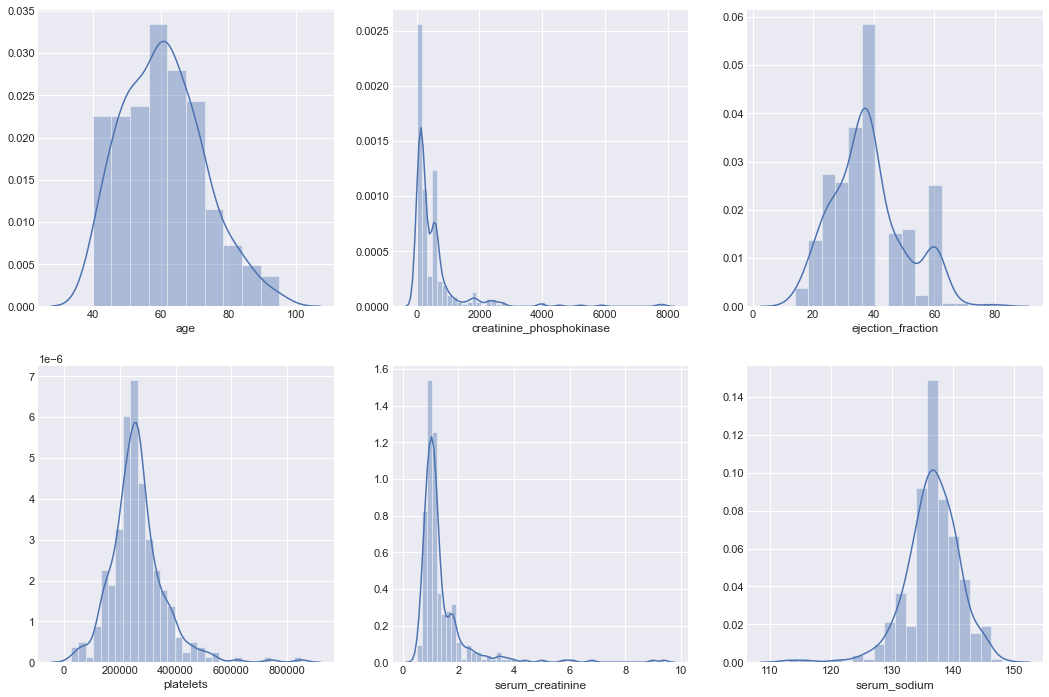

In [62]:

%matplotlib inline

_ = [0, 2, 4, 6, 7, 8]
_ = list(enumerate([list(df.columns)[i] for i in _], start=1))
_

fig = plt.figure(figsize=[18,12])
for index, col_name in _:
    ax = fig.add_subplot(2, 3, index)
    sns.distplot(df[col_name])

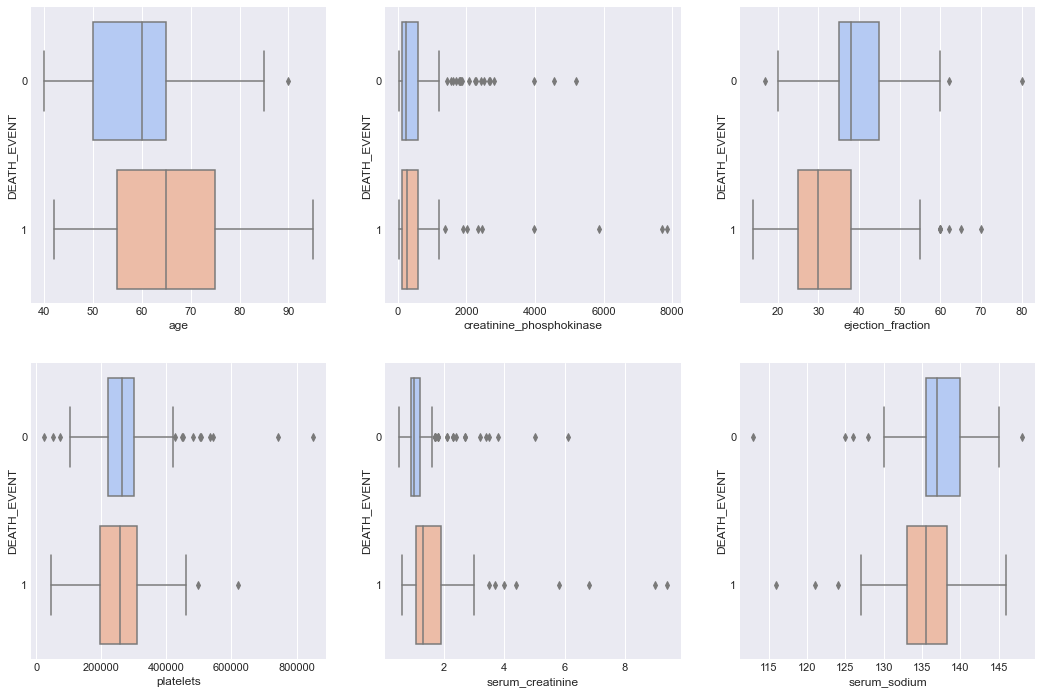

In [63]:
%matplotlib inline

_ = [0, 2, 4, 6, 7, 8]
_ = list(enumerate([list(df.columns)[i] for i in _], start=1))
_

fig = plt.figure(figsize=[18,12])
for index, col_name in _:
    ax = fig.add_subplot(2, 3, index)
    sns.boxplot(x=col_name, y='DEATH_EVENT', data=df, palette="coolwarm", orient='h')

## Data Pre-Processing

Making three copies of the data set

In [64]:
df_dfs = [df.copy() for i in range(3)]

In [65]:
# Classifying as Hyponatremia (1) for Serum Sodium levels of less than 135 mEq/L or normal (0)
df_dfs[1]['serum_sodium'] = df_dfs[1]['serum_sodium'].apply(lambda x: 1 if x < 135 else 0)

# Classifying as elevated Serum Creatinine (1) for levels of more than 1.47 mg/dl or normal (0)
df_dfs[1]['serum_creatinine'] = df_dfs[1]['serum_creatinine'].apply(lambda x: 1 if x >= 1.47 else 0)

Splitting into testing and training data sets

In [66]:
key_names = ['X_train', 'X_test', 'y_train', 'y_test']

for i in range(3):
    X = df_dfs[i].drop('DEATH_EVENT', axis=1)
    y = df_dfs[i]['DEATH_EVENT']
    
    _ = train_test_split(X,y,test_size=0.2,random_state=100)
    _ = dict(zip(key_names, _))
    
    df_dfs[i] = _


In [69]:


scaler = RobustScaler()
scaler.fit(df_dfs[2]['X_train'])

df_dfs[2]['X_train'] = scaler.transform(df_dfs[2]['X_train'])
df_dfs[2]['X_test'] = scaler.transform(df_dfs[2]['X_test'])


In [75]:
df_dfs[2]['X_train'] = pd.DataFrame(df_dfs[2]['X_train'], columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 
                                                                     'ejection_fraction', 'high_blood_pressure', 'platelets', 
                                                                     'serum_creatinine', 'serum_sodium', 'sex', 'smoking'])

df_dfs[2]['X_test'] = pd.DataFrame(df_dfs[2]['X_test'], columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 
                                                                     'ejection_fraction', 'high_blood_pressure', 'platelets', 
                                                                     'serum_creatinine', 'serum_sodium', 'sex', 'smoking'])

### Random Forest

In [78]:
rf_list = []

for i in range(3):     
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(df_dfs[i]['X_train'], df_dfs[i]['y_train'])

    rfc_pred = rfc.predict(df_dfs[i]['X_test'])

    print(classification_report(df_dfs[i]['y_test'], rfc_pred))
    print(confusion_matrix(df_dfs[i]['y_test'], rfc_pred))
    
    rf_list.append(rfc)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        39
           1       0.69      0.52      0.59        21

    accuracy                           0.75        60
   macro avg       0.73      0.70      0.71        60
weighted avg       0.74      0.75      0.74        60

[[34  5]
 [10 11]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        39
           1       0.92      0.52      0.67        21

    accuracy                           0.82        60
   macro avg       0.85      0.75      0.77        60
weighted avg       0.84      0.82      0.80        60

[[38  1]
 [10 11]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.84        39
           1       0.75      0.57      0.65        21

    accuracy                           0.78        60
   macro avg       0.77      0.73      0.75        60
weighted avg       0.78      0.78   

### Logistic Regression

In [81]:
model_list = []

for i in range(3):
    
    log_model = LogisticRegression(max_iter=100000)
    log_model.fit(df_dfs[i]['X_train'], df_dfs[i]['y_train'])
    
    predictions = log_model.predict(df_dfs[i]['X_test'])
    
    print(classification_report(df_dfs[i]['y_test'], predictions))
    print(confusion_matrix(df_dfs[i]['y_test'], predictions))
    
    model_list.append(log_model)

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        39
           1       0.67      0.29      0.40        21

    accuracy                           0.70        60
   macro avg       0.69      0.60      0.60        60
weighted avg       0.69      0.70      0.66        60

[[36  3]
 [15  6]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.82        39
           1       0.73      0.38      0.50        21

    accuracy                           0.73        60
   macro avg       0.73      0.65      0.66        60
weighted avg       0.73      0.73      0.71        60

[[36  3]
 [13  8]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        39
           1       0.57      0.38      0.46        21

    accuracy                           0.68        60
   macro avg       0.64      0.61      0.62        60
weighted avg       0.67      0.68   